<a href="https://colab.research.google.com/github/Corry-Grodek/DataScience/blob/main/CorrGrodU3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 981.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=

# Finding fish lengths

In this project I wanted to find the average fish length from a data set. For my data I used the Rocky Mountain National Park 2021-2022 Trout Inventory, which is available publicly online. The data set included the mass and length of over 2000 recorded trout. To make the data easier to handle, I will be using only the Brook Trout, ("Salvelinus fontinalis") as it was most common in the data set (1749 individuals)

In [2]:
#import libraries
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

#import Fisheries Inventory, Trout Data, at Rocky Mountain National Park 2021-2022
url_fish =  'https://irma.nps.gov/DataStore/DownloadFile/705171?Reference=2304495'
data_fish = pd.read_csv(url_fish)

#preview all data
data_fish


,occurrenceID,eventID,basisOfRecord,taxonID,scientificName,recordedBy,individualCount,organismQuantity,organismQuantityType,occurrenceStatus,publicDisplay,dataAccess,pass,length,mass,geneticsSampled,occurrenceRemarks
0,NIN-2021-001,NIN-2021,HumanObservation,BRK,"Salvelinus fontinalis (Mitchill, 1814)","YK,DP,LF",1,1,individuals,present,yes,unrestricted,1,151.0,31.00,Y,NaN
1,NIN-2021-002,NIN-2021,HumanObservation,BRK,"Salvelinus fontinalis (Mitchill, 1814)","YK,DP,LF",1,1,individuals,present,yes,unrestricted,1,69.0,2.50,Y,NaN
2,NIN-2021-003,NIN-2021,HumanObservation,BRK,"Salvelinus fontinalis (Mitchill, 1814)","YK,DP,LF",1,1,individuals,present,yes,unrestricted,1,55.0,2.00,N,NaN
3,NIN-2021-004,NIN-2021,HumanObservation,BRK,"Salvelinus fontinalis (Mitchill, 1814)","YK,DP,LF",1,1,individuals,present,yes,unrestricted,1,57.0,1.75,N,NaN
4,NIN-2021-005,NIN-2021,HumanObservation,BRK,"Salvelinus fontinalis (Mitchill, 1814)","YK,DP,LF",1,1,individuals,present,yes,unrestricted,1,53.0,1.25,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,MPC-2022-148,MPC-2022,HumanObservation,BRK,"Salvelinus fontinalis (Mitchill, 1814)","TS, FC, SL, GV, AP, MP",1,1,individuals,present,yes,unrestricted,2,139.0,NaN,N,NaN
2136,MPC-2022-149,MPC-2022,HumanObservation,BRK,"Salvelinus fontinalis (Mitchill, 1814)","TS, FC, SL, GV, AP, MP",1,1,individuals,present,yes,unrestricted,2,190.0,NaN,N,NaN
2137,MPC-2022-150,MPC-2022,HumanObservation,BRK,"Salvelinus fontinalis (Mitchill, 1814)","TS, CC, LF, FC, ES, LQ",1,1,individuals,present,yes,unrestricted,2,161.0,NaN,N,NaN
2138,MPC-2022-151,MPC-2022,HumanObservation,BRK,"Salvelinus fontinalis (Mitchill, 1814)","TS, FC, SL, GV, AP, MP",1,1,individuals,present,yes,unrestricted,2,173.0,NaN,N,NaN


(array([  2.,  33.,  82.,  47.,  30.,  74., 124., 125., 106., 178., 206.,
        222., 231., 135.,  81.,  48.,  12.,  10.,   0.,   3.]),
 array([ 19.,  32.,  45.,  58.,  71.,  84.,  97., 110., 123., 136., 149.,
        162., 175., 188., 201., 214., 227., 240., 253., 266., 279.]),
 <BarContainer object of 20 artists>)

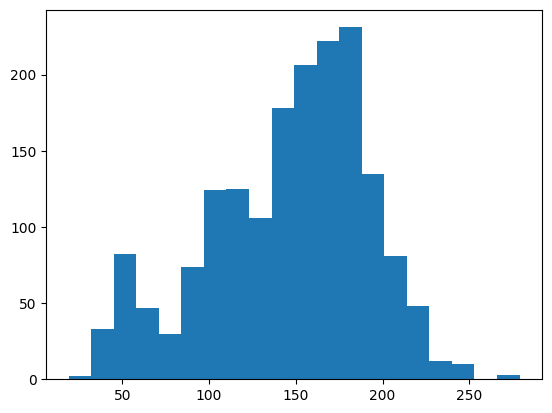

In [3]:
#filter to just the most common species (Brook trout)
sorted = data_fish.query('scientificName == "Salvelinus fontinalis (Mitchill, 1814)"')

#store just the length of the fish and drop null values
lengthdata = sorted['length'].dropna()

#plot histogram for visualization
plt.hist(lengthdata, bins = 20)

For my priors I wanted to start with a uniform distribution for the mean and a normal distribution for the standard deviation. I was not sure where the mean would be as the data is scewed right, and the data seemed to drop off fairly quick from there, so I used a normal distribution centered at the same point as the uniform distribution. A normal distribution seemed like a fair assumption for what a natural process would result in.

<Axes: >

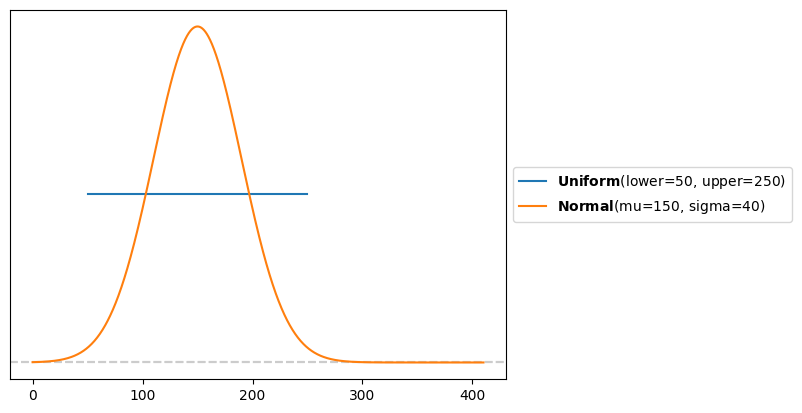

In [9]:
#prior visualizations
pz.Uniform(lower=50, upper=250).plot_pdf()
pz.Normal(mu=150, sigma=40).plot_pdf(support=(0,410))

Output()

Output()

Output()

<Axes: xlabel='L'>

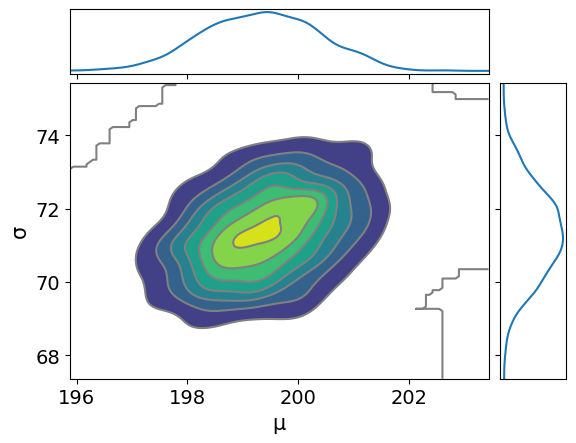

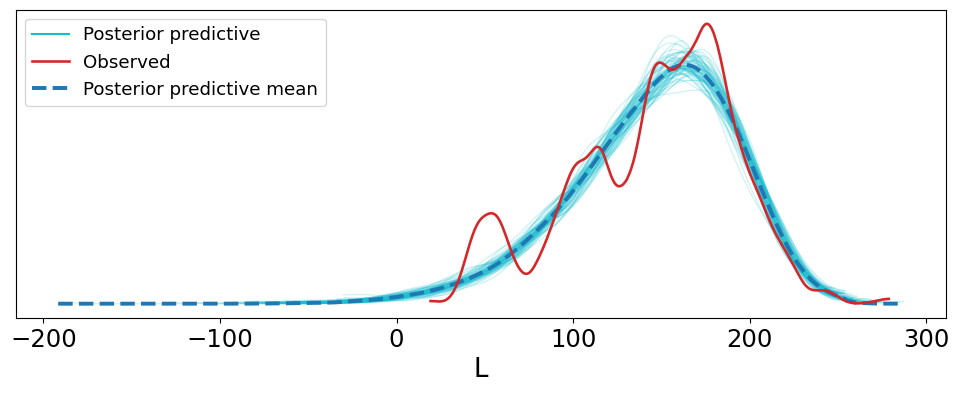

In [10]:
#First model using Uniform and Normal

with pm.Model() as model_fish1:

    #Mean - Uniform
    μ = pm.Uniform('μ', lower=50, upper=220)

    #Standard deviation - Normal
    σ = pm.Normal('σ',mu =150,sigma=40)

    #Model with both priors
    L = pm.SkewNormal('L', mu = μ, alpha=-3, sigma = σ, observed=lengthdata)

    #Sample the model
    fishdata1 = pm.sample(1000)

#visualizations
az.plot_pair(fishdata1, kind='kde', marginals=True)
pm.sample_posterior_predictive(fishdata1, model=model_fish1, extend_inferencedata=True)
az.plot_ppc(fishdata1, num_pp_samples=70, figsize=(12, 4), colors=["C9", "C3", "C10"])

After tweaking my values this model looked pretty good, and seemed to fit the general trend of the data set. I thought I would try another model to see if I could improve how the model performs, I was hoping to see the left side of the graph track closer to observed data.

For my second set of priors, I wanted to try using a normal distribution for the mean because I was more confident than a uniform distribution.

<Axes: >

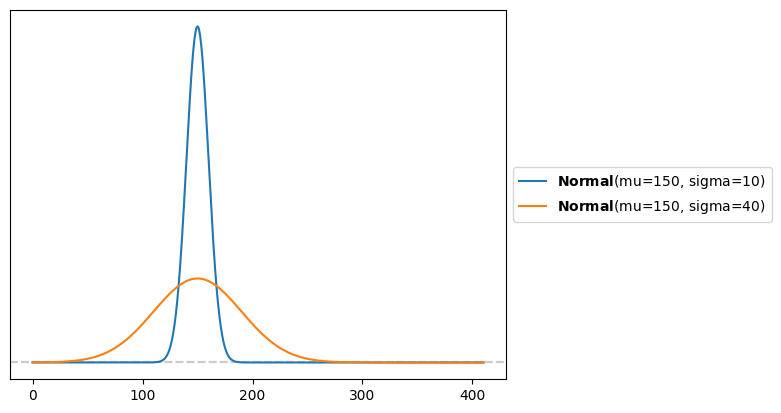

In [6]:
#second set of priors
pz.Normal(mu=150, sigma=10).plot_pdf(support=(0,410))
pz.Normal(mu=150, sigma=40).plot_pdf(support=(0,410))

Output()

Output()

Output()

<Axes: xlabel='L'>

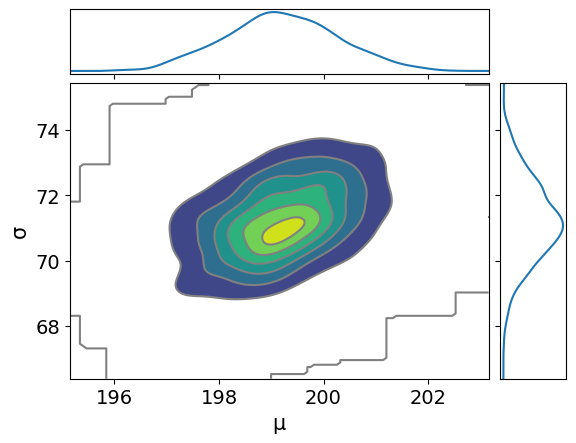

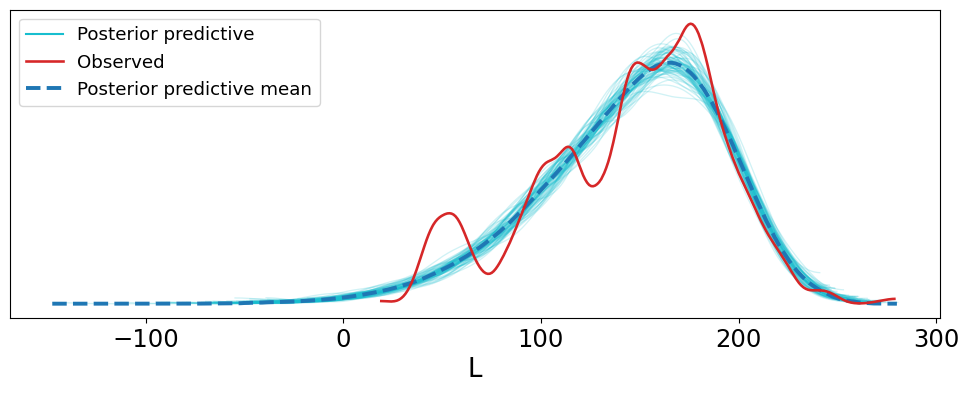

In [7]:
#Second model using normal and normal
with pm.Model() as model_fish2:

    #Mean
    μ = pm.Normal('μ',mu=10, sigma=40)

    #Standard deviation
    σ = pm.Normal('σ',mu =150,sigma=140)

    #Model with both priors
    L = pm.SkewNormal('L', mu = μ, alpha=-3, sigma = σ, observed=lengthdata)

    #Sample the model
    fishdata2 = pm.sample(1000)

#visualizations
az.plot_pair(fishdata2, kind='kde', marginals=True)
pm.sample_posterior_predictive(fishdata2, model=model_fish2, extend_inferencedata=True)
az.plot_ppc(fishdata2, num_pp_samples=70, figsize=(12, 4), colors=["C9", "C3", "C10"])


[145.25727728097058,
 2152.7197547455207,
 -0.6670235701524082,
 0.5097701294494131]

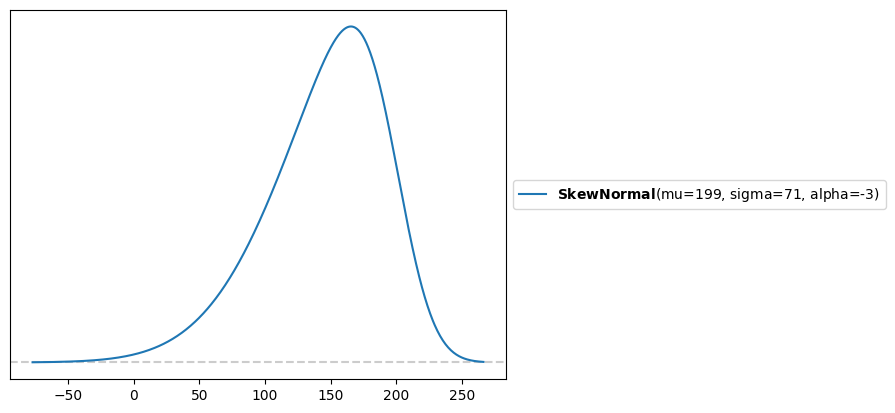

In [8]:
#Values from model put into an analytical SkewNormal distribution
analytical = pz.SkewNormal(mu = 199, alpha = -3, sigma =71)

#Plot and return mean etc
analytical.plot_pdf()
analytical.moments()

Regardless of where the mean and standard deviation were set, as long as it was somewhat sensical, the posterior predictive seemed to do the same thing. I suspect this is because of the fairly large data set. My final result is an average Brook Trout length of 145mm.